In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

import tensorflow_datasets as tfds

import copy
import cv2
from PIL import Image, ImageDraw

print('weeee')

Init Plugin
Init Graph Optimizer
Init Kernel
weeee


In [3]:
print(os.getenv("HOME") + "Desktop/workspace/aiffel_git/data/GD8")

/Users/toriDesktop/workspace/aiffel_git/data/GD8


In [4]:
# takes abit to download
import urllib3
urllib3.disable_warnings()

data_dir = os.path.join(os.getenv("HOME"), "desktop/workspace/aiffel_git/data/GD8")

(ds_train, ds_test), ds_info = tfds.load(
    'kitti',
    data_dir=data_dir,
    split=['train', 'test'],
    shuffle_files=True,
    with_info=True,
)

print('Data loaded')

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Data loaded


2021-10-22 09:30:58.449025: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-10-22 09:30:58.449106: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


2021-10-22 09:57:14.630750: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-10-22 09:57:14.634132: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


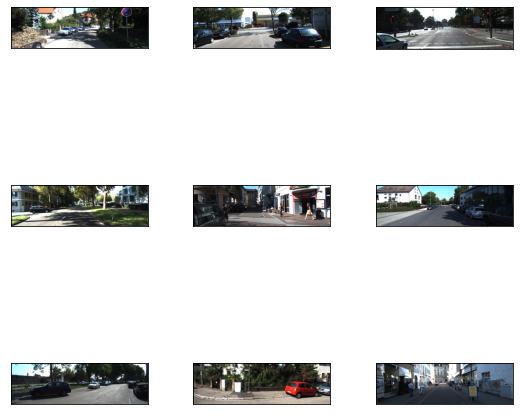

In [5]:
# example dataset
_ = tfds.show_examples(ds_train, ds_info)

In [6]:
ds_info

tfds.core.DatasetInfo(
    name='kitti',
    full_name='kitti/3.2.0',
    description="""
    Kitti contains a suite of vision tasks built using an autonomous driving
    platform. The full benchmark contains many tasks such as stereo, optical flow,
    visual odometry, etc. This dataset contains the object detection dataset,
    including the monocular images and bounding boxes. The dataset contains 7481
    training images annotated with 3D bounding boxes. A full description of the
    annotations can be found in the readme of the object development kit readme on
    the Kitti homepage.
    """,
    homepage='http://www.cvlibs.net/datasets/kitti/',
    data_path='/Users/tori/desktop/workspace/aiffel_git/data/GD8/kitti/3.2.0',
    download_size=11.71 GiB,
    dataset_size=5.27 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/file_name': Text(shape=(), dtype=tf.string),
        'objects': Sequence({
            'alpha': tf.f

------Example------
['image', 'image/file_name', 'objects']
------objects------
{'alpha': <tf.Tensor: shape=(9,), dtype=float32, numpy=
array([-1.57, -2.08, -2.02, -2.25, -2.25, -1.7 , -1.55, -1.78,  2.23],
      dtype=float32)>, 'bbox': <tf.Tensor: shape=(9, 4), dtype=float32, numpy=
array([[0.39072   , 0.4691063 , 0.5112    , 0.5134058 ],
       [0.22586666, 0.16069244, 0.56626666, 0.3483575 ],
       [0.29925334, 0.24628824, 0.5637867 , 0.3707971 ],
       [0.37325335, 0.31165057, 0.51176   , 0.40289855],
       [0.40493333, 0.34088567, 0.55      , 0.4252657 ],
       [0.41533333, 0.52987117, 0.5918933 , 0.58776975],
       [0.44256   , 0.4702335 , 0.52602667, 0.49786633],
       [0.00266667, 0.        , 0.6708    , 0.14388889],
       [0.31493333, 0.        , 0.67413336, 0.13854267]], dtype=float32)>, 'dimensions': <tf.Tensor: shape=(9, 3), dtype=float32, numpy=
array([[1.36, 1.69, 3.38],
       [1.76, 1.74, 4.16],
       [1.83, 1.64, 3.71],
       [1.5 , 1.58, 3.57],
       [1.8 ,

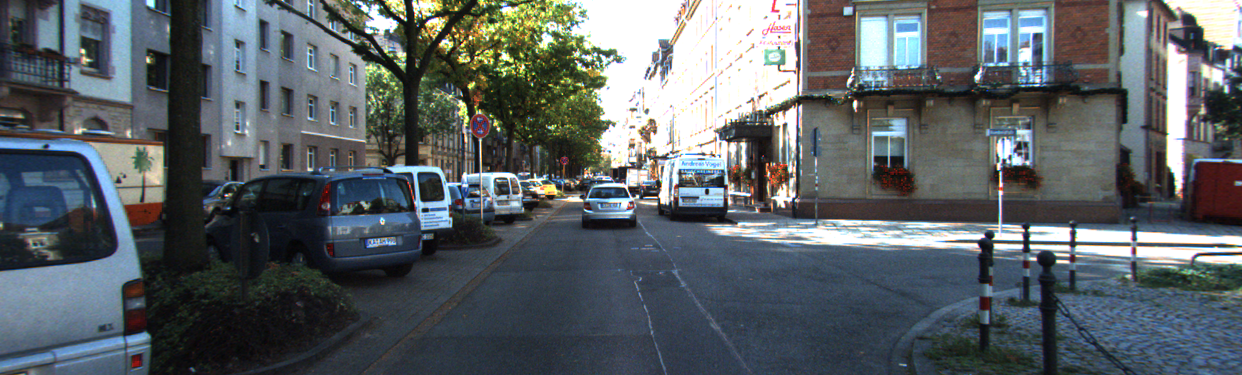

In [7]:
sample = ds_train.take(1)

for example in sample:  
    print('------Example------')
    print(list(example.keys())) # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
    image = example["image"]
    filename = example["image/file_name"].numpy().decode('utf-8')
    objects = example["objects"]

print('------objects------')
print(objects)

img = Image.fromarray(image.numpy())
img